<a href="https://colab.research.google.com/github/emiliagyr/EstadisticaExperimental/blob/main/Colab/2vias_sol2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pingouin
!pip install pyreadstat

In [ ]:
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt

Variable independiente 1

H0: u1 = U2 = U3 = U4 (las mediciones son iguales)
H1: Al menos 2 son distintos

Variable independiente 2

H0: u1 = U2 = U3 = U4 (las mediciones son iguales)
H1: Al menos 2 son distintos

Interacción

H0: No hay interacción
H1: Si hay interacción

#1. Leer los datos del documento .sav (SPSS) o .csv (Excel)

In [ ]:
df = pd.read_spss("VIPP-SD.sav")
df

,Sujeto,NSE,Pre,Post,Post06m,Post12m
0,1.0,Medio,16.0,18.0,18.0,17.0
1,2.0,Medio,16.0,18.0,18.0,17.0
2,3.0,Bajo,12.0,14.0,14.0,13.0
3,4.0,Medio,15.0,18.0,18.0,17.0
4,5.0,Bajo,12.0,15.0,15.0,15.0
...,...,...,...,...,...,...
115,116.0,Bajo,12.0,15.0,15.0,14.0
116,117.0,Bajo,12.0,16.0,15.0,14.0
117,118.0,Bajo,13.0,16.0,15.0,14.0
118,119.0,Alto,13.0,16.0,16.0,15.0


##2. Es necesario crear una columna de las mediciones x intervencion para tener todos los puntajes de sensibilidad juntos

In [ ]:
melt_df = pd.melt(
    df, value_name="Sensibilidad", var_name="Medxinter", id_vars=["NSE", "Sujeto"]
)
melt_df

,NSE,Sujeto,Medxinter,Sensibilidad
0,Medio,1.0,Pre,16.0
1,Medio,2.0,Pre,16.0
2,Bajo,3.0,Pre,12.0
3,Medio,4.0,Pre,15.0
4,Bajo,5.0,Pre,12.0
...,...,...,...,...
475,Bajo,116.0,Post12m,14.0
476,Bajo,117.0,Post12m,14.0
477,Bajo,118.0,Post12m,14.0
478,Alto,119.0,Post12m,15.0


##3. Pruebas de homogeneidad

Prueba de esfericidad de Mauchly
(Homogeneidad de varianzas para intrasujeto)

In [ ]:
pg.sphericity(data=melt_df, dv='Sensibilidad', subject='Sujeto', within='Medxinter')

SpherResults(spher=False, W=0.7244465475355981, chi2=37.94744029049675, dof=5, pval=3.8720094008111637e-07)

Prueba de igualdad de Levene (Homogeneidad de varianzas para intersujeto)

In [ ]:
pg.homoscedasticity(data=melt_df, dv='Sensibilidad', group='NSE')

,W,pval,equal_var
levene,68.658053,6.239715e-27,False


Por lo tanto rechazamos la homogeneidad de las varianzas, son varianzas heterogéneas

##4. Anova 2 vías

In [ ]:
pg.anova(dv="Sensibilidad", between=["Medxinter", "NSE"], data=melt_df)

,Source,SS,DF,MS,F,p-unc,np2
0,Medxinter,524.983333,3.0,174.994444,47.619732,7.121085e-27,0.233866
1,NSE,112.643388,2.0,56.321694,15.326338,3.570768e-07,0.061471
2,Medxinter * NSE,44.519257,6.0,7.419876,2.019107,6.171433e-02,0.025233
3,Residual,1719.820689,468.0,3.674831,NaN,NaN,NaN


Sí hay interacción, se aceptan las 3 hipótesis 1

##5. Graficar los datos

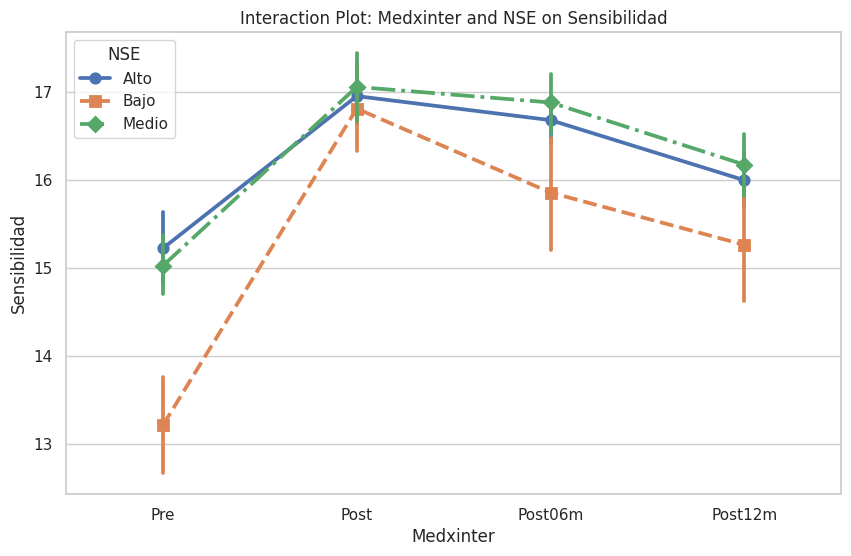

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.pointplot(data=melt_df, x='Medxinter', y='Sensibilidad', hue='NSE', markers=['o', 's', 'D'], linestyles=['-', '--', '-.'])
plt.title('Interaction Plot: Medxinter and NSE on Sensibilidad')
plt.xlabel('Medxinter')
plt.ylabel('Sensibilidad')
plt.legend(title='NSE')
plt.show()


##6. Post-Hoc

In [28]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
   Post Post06m  -0.6083 0.0837 -1.2693  0.0526  False
   Post Post12m    -1.25    0.0 -1.9109 -0.5891   True
   Post     Pre  -2.8083    0.0 -3.4693 -2.1474   True
Post06m Post12m  -0.6417 0.0607 -1.3026  0.0193  False
Post06m     Pre     -2.2    0.0 -2.8609 -1.5391   True
Post12m     Pre  -1.5583    0.0 -2.2193 -0.8974   True
------------------------------------------------------


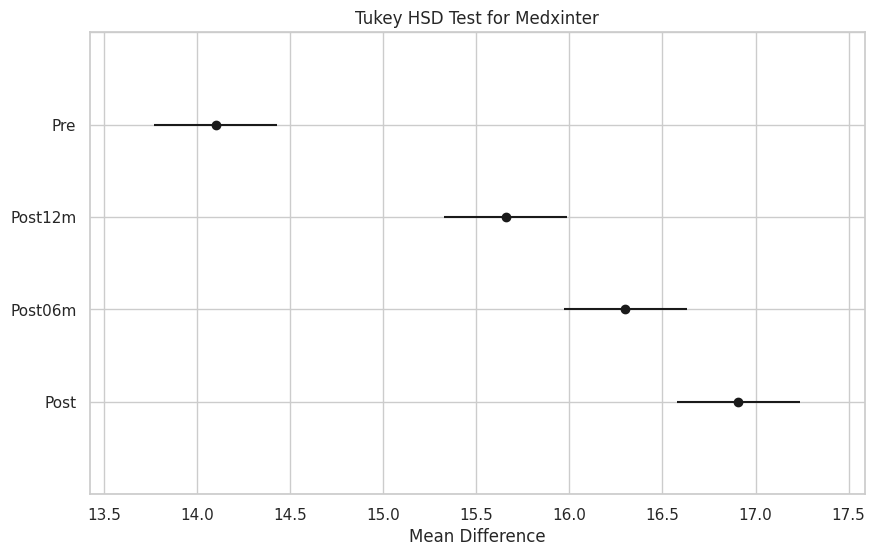

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Alto   Bajo  -0.9268 0.0019 -1.5633 -0.2904   True
  Alto  Medio   0.0709 0.9697 -0.6338  0.7755  False
  Bajo  Medio   0.9977 0.0001  0.4512  1.5442   True
----------------------------------------------------


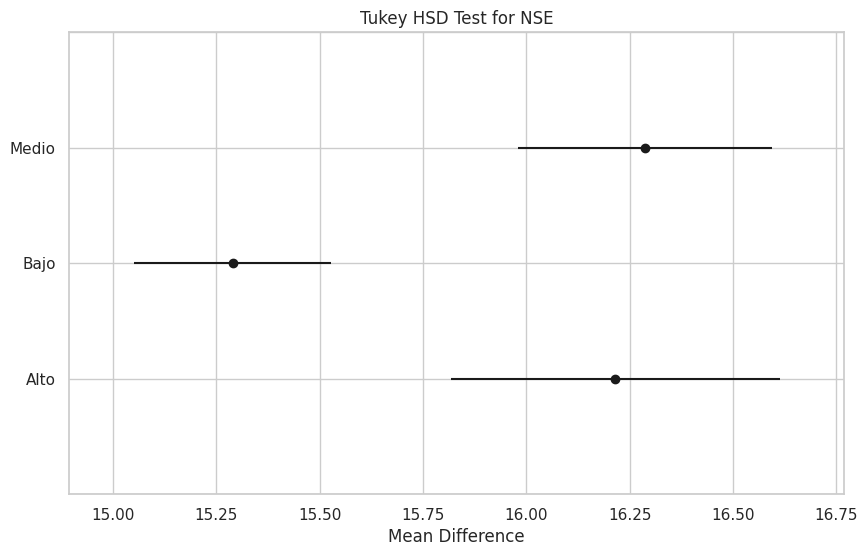

In [29]:
# Perform post hoc Tukey HSD test for Medxinter
tukey_medxinter = pairwise_tukeyhsd(endog=melt_df['Sensibilidad'], groups=melt_df['Medxinter'], alpha=0.05)
print(tukey_medxinter)
tukey_medxinter.plot_simultaneous()
plt.title('Tukey HSD Test for Medxinter')
plt.xlabel('Mean Difference')
plt.grid(True)
plt.show()

# Perform post hoc Tukey HSD test for NSE
tukey_nse = pairwise_tukeyhsd(endog=melt_df['Sensibilidad'], groups=melt_df['NSE'], alpha=0.05)
print(tukey_nse)
tukey_nse.plot_simultaneous()
plt.title('Tukey HSD Test for NSE')
plt.xlabel('Mean Difference')
plt.grid(True)
plt.show()

#Conclusión

En general:

1. Hay diferencias entre los grupos intrasujeto e intersujeto e interacción.

En específico:

1. No hay diferencias entre NSE Alto y Medio

2. No hay diferencias entre Post y Post06m

3. No hay diferencias entre Post06m y Post12m
